In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) # For reproducibility


In [11]:
n = 1000 # personer
heights = np.random.normal(loc=172, scale=10, size=n) # loc = medelvärde i cm, scale = standardavvikelse, size = n är antal värden
heights[:5] = [145, 198, 205, 150, 190] # några extremvärden för att illustrera robusta mått

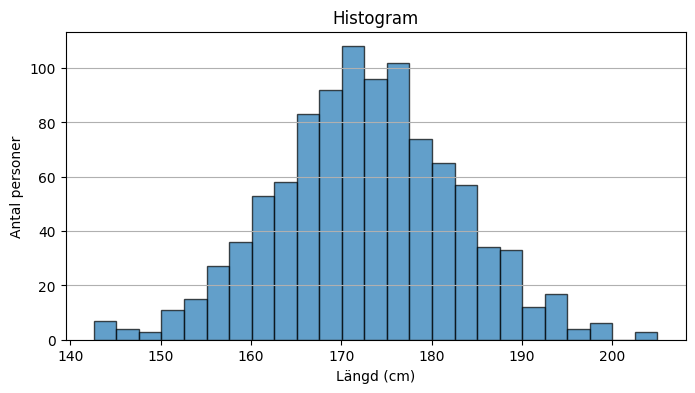

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(heights, bins=25, alpha=0.7, edgecolor='black')
ax.set_title('Histogram')
ax.set_xlabel('Längd (cm)')
ax.set_ylabel('Antal personer')
ax.grid(axis='y')
plt.show()

In [13]:
mean_x = np.mean(heights)
medisan_x = np.median(heights)
std_x = np.std(heights, ddof=1) # sample standard deviation

print(f'Medelvärde: {mean_x:.2f} cm')
print(f'Median: {medisan_x:.2f} cm')
print(f'Standardavvikelse: {std_x:.2f} cm')

Medelvärde: 172.71 cm
Median: 172.63 cm
Standardavvikelse: 10.12 cm


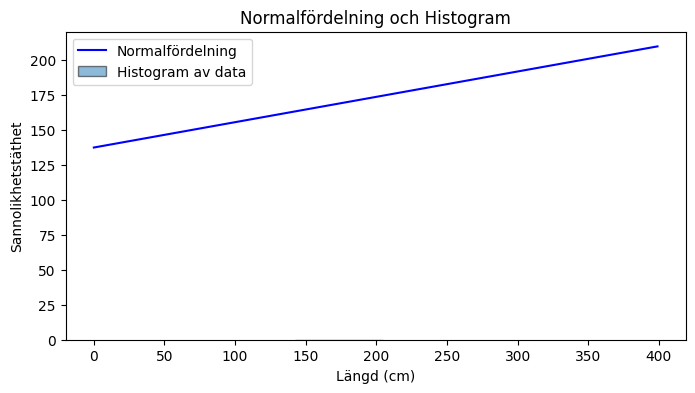

In [ ]:
def normal_pdf(x, m, s):
    """räknar ut sannolikhetstätheten för normalfördelning"""
    x = np.asarray(x, dtype=float)
    if s <= 0 or not np.isfinite(s):  # isfinite kollar om värdet är ändligt och inte NaN eller oändligt och inte negativt
        raise ValueError("Standardavvikelsen måste vara positiv och ändlig.")
    
    norm = 1.0 / (s * np.sqrt(2.0 * np.pi))
    z = (x - m) / s
    y = norm * np.exp(-0.5 * z**2)
    return y

x_support = np.linspace(heights.min() -5, heights.max() +5, 400)
pdf_values = normal_pdf(x_support, mean_x, std_x)   
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x_support, pdf_values, label='Normalfördelning', color='blue')
ax.hist(heights, bins=25, density=True, alpha=0.5, edgecolor='black', label='Histogram av data')
ax.set_title('Normalfördelning och Histogram')
ax.set_xlabel('Längd (cm)')
ax.set_ylabel('Sannolikhetstäthet')
ax.legend()
plt.show()
